<a href="https://colab.research.google.com/github/nrkfeller/YCBS_notes/blob/master/C2_Walkthrough_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns

In [0]:
!wget https://storage.googleapis.com/nicksdemobucket/wines.csv

--2019-03-18 22:54:02--  https://storage.googleapis.com/nicksdemobucket/wines.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10957 (11K) [application/octet-stream]
Saving to: ‘wines.csv’

wines.csv           100%[===================>]  10.70K  --.-KB/s    in 0s      

2019-03-18 22:54:02 (57.9 MB/s) - ‘wines.csv’ saved [10957/10957]



In [0]:
df = pd.read_csv('wines.csv')

In [0]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
X = df.drop(['Alcohol'], axis=1).values
X.shape

(178, 13)

In [0]:
y = df[['Alcohol']].values
y.shape

(178, 1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.train import AdamOptimizer

In [0]:
model = Sequential()

model.add(Dense(4, input_shape=(13,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',
                optimizer=AdamOptimizer(0.01),
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [0]:
h = model.fit(X, y, epochs=100, validation_split=0.2)

Train on 142 samples, validate on 36 samples
Epoch 1/100
142/142 [==============================] - 0s 804us/sample - loss: 138.3389 - mean_absolute_error: 10.5989 - mean_squared_error: 138.3389 - val_loss: 142.0060 - val_mean_absolute_error: 11.5320 - val_mean_squared_error: 142.0060
Epoch 2/100
142/142 [==============================] - 0s 97us/sample - loss: 137.6708 - mean_absolute_error: 11.1674 - mean_squared_error: 137.6707 - val_loss: 147.9996 - val_mean_absolute_error: 11.7336 - val_mean_squared_error: 147.9996
Epoch 3/100
142/142 [==============================] - 0s 80us/sample - loss: 127.0282 - mean_absolute_error: 10.4545 - mean_squared_error: 127.0282 - val_loss: 75.8923 - val_mean_absolute_error: 7.4713 - val_mean_squared_error: 75.8923
Epoch 4/100
142/142 [==============================] - 0s 89us/sample - loss: 105.2491 - mean_absolute_error: 9.0566 - mean_squared_error: 105.2491 - val_loss: 53.9499 - val_mean_absolute_error: 5.3282 - val_mean_squared_error: 53.9499
E

In [0]:
h.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])

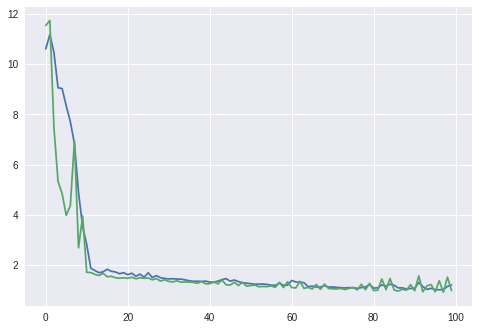

In [0]:
import matplotlib.pyplot as plt
plt.plot(h.history['mean_absolute_error'])
plt.plot(h.history['val_mean_absolute_error'])